# Coevolution Streptococcus-Lactobacilus

## Obtain data from servers

In [10]:
import requests, sys


1301
Streptococcus
1302
Streptococcus gordonii
1303
Streptococcus oralis
1304
Streptococcus salivarius
1305
Streptococcus sanguinis
1306
Streptococcus sp.
1307
Streptococcus suis
1308
Streptococcus thermophilus
1309
Streptococcus mutans
1310
Streptococcus sobrinus
1311
Streptococcus agalactiae
1313
Streptococcus pneumoniae
1314
Streptococcus pyogenes
1317
Streptococcus downei
1318
Streptococcus parasanguinis
1319
Streptococcus sp. 'group B'
1320
Streptococcus sp. group G
1324
Streptococcus sp. G148
1325
Streptococcus sp. GX7805
1326
Streptococcus acidominimus
1328
Streptococcus anginosus
1329
Streptococcus canis
1332
Streptococcus criae
1333
Streptococcus criceti
1334
Streptococcus dysgalactiae
1335
Streptococcus equinus
1336
Streptococcus equi
1337
Streptococcus hyointestinalis
1338
Streptococcus intermedius
1339
Streptococcus macacae
1340
Streptococcus porcinus
1341
Streptococcus ratti
1343
Streptococcus vestibularis
1345
Streptococcus ferus
1346
Streptococcus iniae
1348
Streptococcu

In [22]:
def load_taxa(scientific_prefix):
    """
    """
    requestURL = "https://www.ebi.ac.uk/proteins/api/taxonomy/name/" + scientific_prefix +\
                "%20?pageNumber=1&pageSize=100&searchType=STARTSWITH&fieldName=SCIENTIFICNAME"

    r = requests.get(requestURL, headers={ "Accept" : "application/json"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    jsonBody = json.loads(r.text)
    taxa = []
    names = []
    for taxonomy in jsonBody["taxonomies"]:
        print(taxonomy['taxonomyId'])
        print(taxonomy['scientificName'])
        taxa.append(taxonomy['taxonomyId'])
        names.append(taxonomy['scientificName'])
    return taxa, names

termophilus_taxa,  termophilus_names = load_taxa("Streptococcus thermophilus")
streptococcus_taxa,  streptococcus_names = load_taxa("Streptococcus")


264199
Streptococcus thermophilus (strain ATCC BAA-250 / LMG 18311)
299768
Streptococcus thermophilus (strain CNRZ 1066)
322159
Streptococcus thermophilus (strain ATCC BAA-491 / LMD-9)
767463
Streptococcus thermophilus (strain ND03)
1042404
Streptococcus thermophilus CNCM I-1630
1051074
Streptococcus thermophilus JIM 8232
1073569
Streptococcus thermophilus MTCC 5460
1073570
Streptococcus thermophilus MTCC 5461
1091038
Streptococcus thermophilus DSM 20617
1187956
Streptococcus thermophilus MN-ZLW-002
1263110
Streptococcus thermophilus CAG:236
1268061
Streptococcus thermophilus DGCC 7710
1408178
Streptococcus thermophilus ASCC 1275
1415776
Streptococcus thermophilus TH1435
1423145
Streptococcus thermophilus TH1436
1433288
Streptococcus thermophilus MTH17CL396
1433289
Streptococcus thermophilus M17PTZA496
1435972
Streptococcus thermophilus TH985
1435974
Streptococcus thermophilus TH982
1435981
Streptococcus thermophilus 1F8CT
1436725
Streptococcus thermophilus TH1477
1302
Streptococcus go

In [185]:
def load_proteome(taxids, size=10, protein=["LDH"]):
    """
    """
    taxids_str = ",".join(str(x) for x in taxids)
    protein_str = ",".join(x for x in protein)
    print(taxids_str)
    requestURL = "https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=" + str(size) + "&taxid=" +\
                    taxids_str + "&reviewed=false"
    if protein != []:
        requestURL += "&protein=" + protein_str 
    print(requestURL)
    r = requests.get(requestURL, headers={ "Accept" : "text/x-fasta"})

    if not r.ok:
      r.raise_for_status()
      sys.exit()

    proteome = r.text
    return proteome

termophilus_taxids = termophilus_taxa[0:19]
streptococcus_taxids = streptococcus_taxa[0:19]
print(streptococcus_taxids)
print(termophilus_taxids)

streptococcus_proteome = load_proteome(streptococcus_taxids, -1, protein = ["LDH", "CAS2", "CAS3"])

termophilus_proteome = load_proteome(termophilus_taxids, -1, protein = ["LDH", "CAS2", "CAS3"])


[1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1313, 1314, 1317, 1318, 1319, 1320, 1324, 1325, 1326]
[264199, 299768, 322159, 767463, 1042404, 1051074, 1073569, 1073570, 1091038, 1187956, 1263110, 1268061, 1408178, 1415776, 1423145, 1433288, 1433289, 1435972, 1435974]


TypeError: 'str' object is not callable

In [169]:
import re

def proteome2dict(proteome_fasta):
    """
    Returns a dict with keys protein accession and values the list of fasta format for all taxids
    Thi is the basis for clustalw alignments and tree generation
    """
    
    proteome = {}
    key_found = False
    for line in proteome_fasta.splitlines():
        if len(line) > 0:
            if line[0] == ">":
                if key_found:
                    if key in proteome:
                        proteome[key].append(seq)
                    else:
                        proteome[key] = [seq]
                key_found = True            
                search_gene_name = re.search('GN=(\w*)', line)
                key = search_gene_name.group(1).upper()
                #print(key)
                seq = line + '\n'
            elif key_found:
                seq += line + '\n'
    if key_found:
        if key in proteome:
            proteome[key].append(seq)
        else:
            proteome[key] = [seq]
    return proteome

print(len(termophilus_proteome))
#print("Proteome", termophilus_proteome)

proteome = proteome2dict(termophilus_proteome)
# #print(proteome)
# count = 0
# for key in proteome.keys():
#     l = len(proteome[key])
#     if l > 1 or key == "LDH":
#         print(key, l)
#     count += 1
    
# f = open("termophilus_proteome.fasta", "w")
# f.write(termophilus_proteome)



1803
LDH 4


1803

In [177]:
# Phylo tree with clustalw. We need to measure the substitution rate.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from Bio import Phylo
from io import StringIO
import os
from Bio.Align.Applications import ClustalwCommandline
CLUSTALW = r"./clustalw2"
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
plt.rcParams["figure.figsize"] = (20,30)
matplotlib.rc('font', size=12)
        
def compute_mean_subst_rate(proteome, verbose=False, show_tree=False):
    """
    """
    clustalw_cline = ClustalwCommandline(CLUSTALW, infile=proteome + ".fasta")
    stdout, stderr = clustalw_cline()
    f = open(proteome + ".dnd", "r")
    s_tree = f.read()
    f.close()
    #print(s_tree)
    branch_len = 0
    num_branches = 0
    search_branch_length = re.findall(':([.0123456789]*)', s_tree)
    for branch_length in search_branch_length:
        #print(branch_length)
        if branch_length != "0.00000":
            branch_len += float(branch_length)
            num_branches += 1
    if verbose: print(branch_len, num_branches, branch_len/num_branches)
    if show_tree:
        tree = Phylo.read(proteome + ".dnd", "newick")
        Phylo.draw(tree)
    return branch_len/num_branches

def compute_subst_rates(proteome, proteome_name, verbose=False):
    """
    """
    subst_rates = {}
    for protein in proteome.keys():
        if verbose: print(protein)
        protein_sequence = ""
        for sequence in proteome[protein]:
            protein_sequence += sequence
        fasta_file_name = proteome_name + "_" + protein
        f = open(fasta_file_name + ".fasta", "w")
        if verbose: print(protein_sequence)
        f.write(protein_sequence)
        f.close()
        mean_subst_rate = compute_mean_subst_rate(fasta_file_name)
        subst_rates[protein] = mean_subst_rate
    return subst_rates

subst_rates_groups = {}
subst_rates_groups["termophilus"] = compute_subst_rates(proteome, "termophilus", False)
print(subst_rates_groups)

{'termophilus': {'LDH': 0.007116666666666667}}


In [6]:
%%bash
export WEBSERVICES=/Users/nandoide/Desktop/uni/PRMDM.work/REST/EBI/webservice-clients/python
export EMAIL=fernando.freire@estudiante.uam.es
export FASTA_FILE=p1.fasta
$WEBSERVICES/ncbiblast.py  --outformat ids,xml --email $EMAIL --database uniprotkb_swissprot --stype protein --program blastp $FASTA_FILE

RUNNING
FINISHED
Creating result file: ncbiblast-R20181203-121349-0115-30934138-p1m.ids.txt
Creating result file: ncbiblast-R20181203-121349-0115-30934138-p1m.xml.xml


JobId: ncbiblast-R20181203-121349-0115-30934138-p1m


In [3]:
import requests, sys
query = "https://www.uniprot.org/uniprot/?query=pathway%3A553+streptococcus+AND+reviewed%3Ayes&sort=id&desc=no"
#query = "https://www.ebi.ac.uk/proteins/api/proteomes?offset=0&size=-1&taxid=1301&is_redundant=false"
r = requests.get(query, headers={"Content-Type" : "application/json"})
 
if not r.ok:
    r.raise_for_status()
    sys.exit()
    
#print(r.text)


## Pathway Fermentation

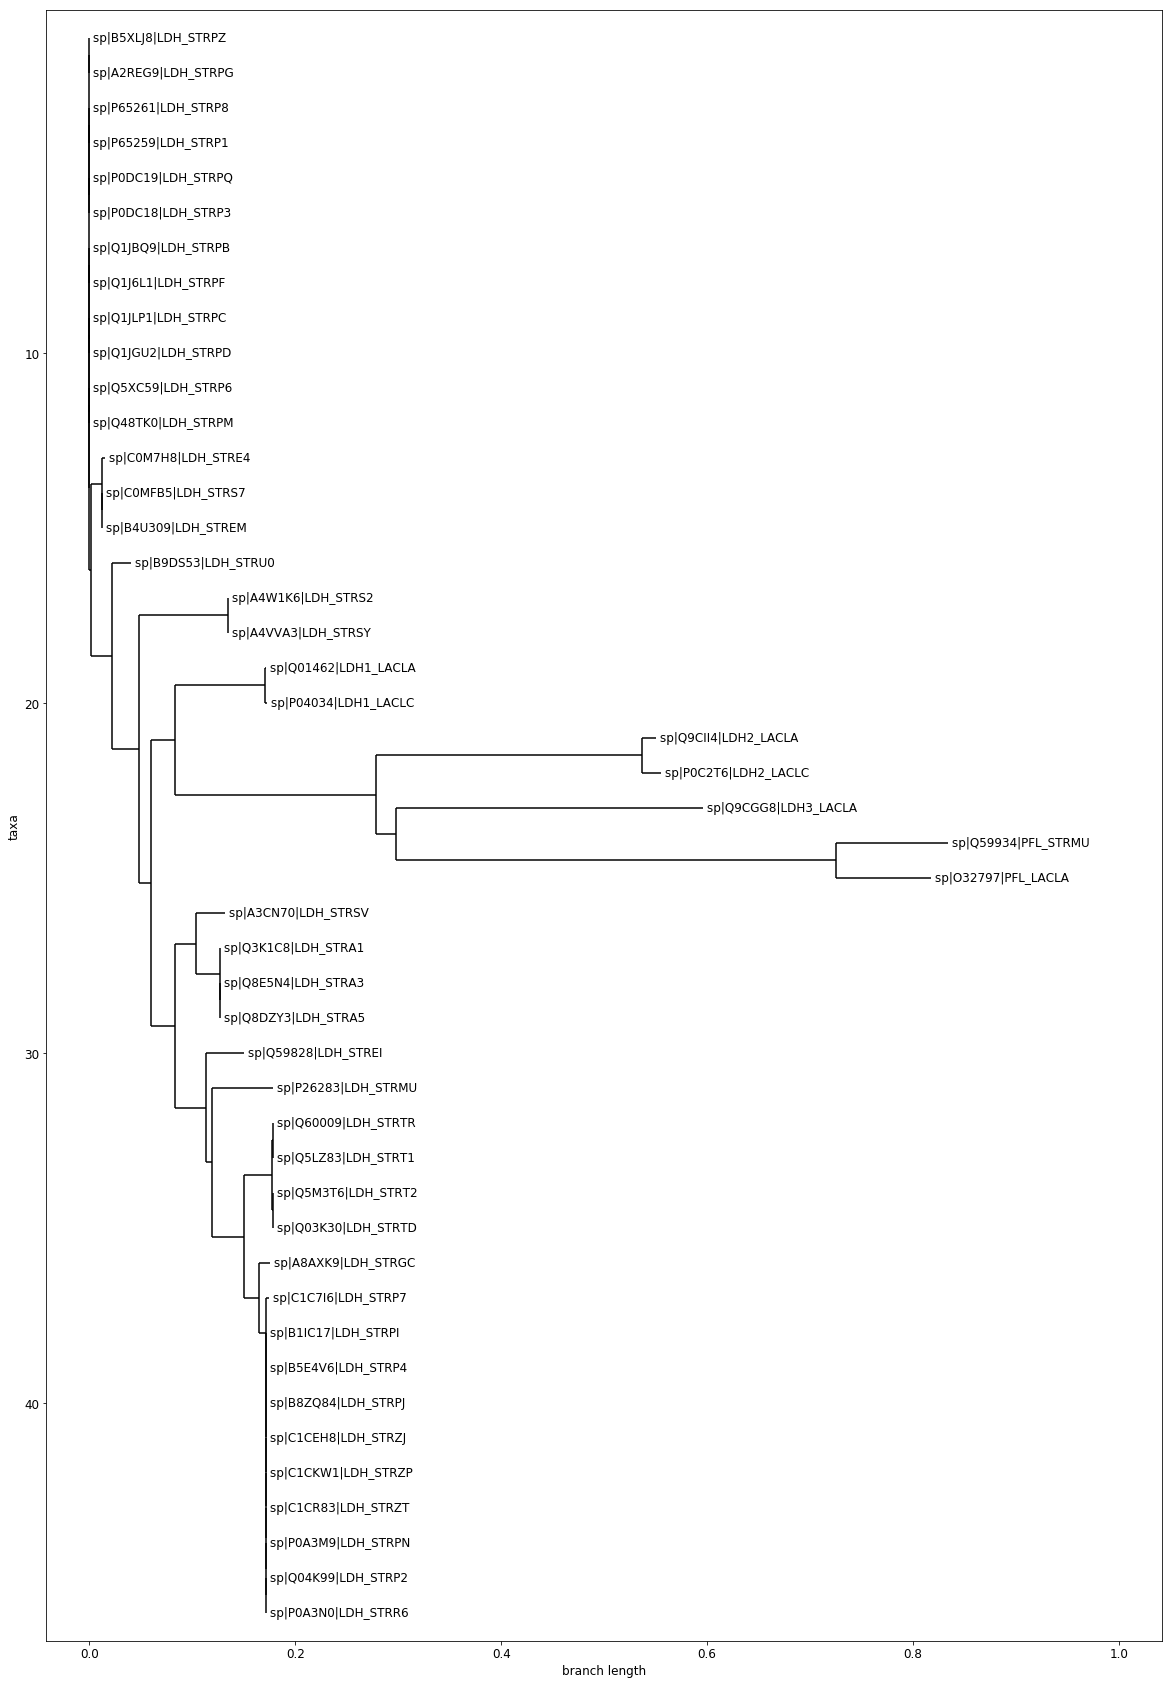

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from Bio import Phylo
from io import StringIO
plt.rcParams["figure.figsize"] = (20,30)

matplotlib.rc('font', size=12)
tree = Phylo.read('phylotree_fermentation.txt', 'newick')
tree.ladderize()   # Flip branches so deeper clades are displayed at top
Phylo.draw(tree)

## Pathway Cell Wall Synthesis

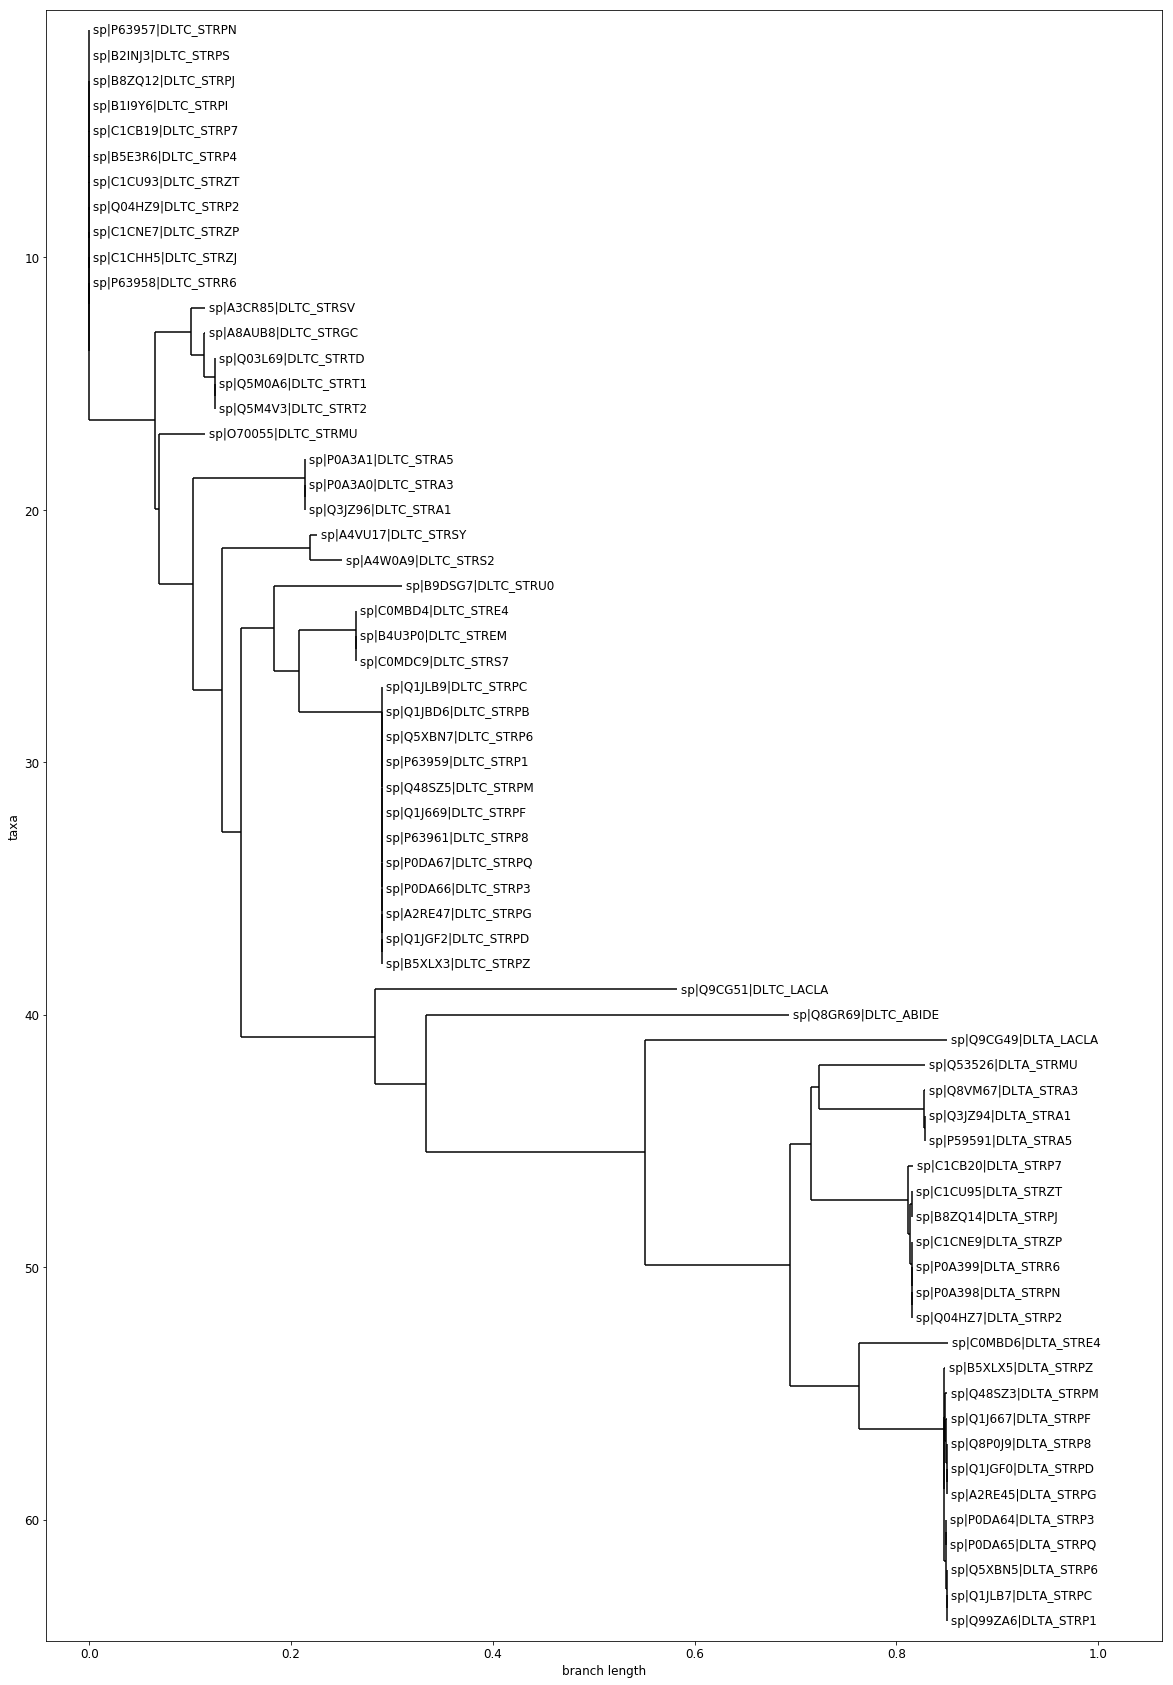

In [5]:
matplotlib.rc('font', size=12)
tree = Phylo.read('phylotree_cellwall.txt', 'newick')
tree.ladderize()
Phylo.draw(tree)

In [73]:
%%bash
#cd /Users/nandoide/Desktop/uni/STRBI.practical
jupyter nbconvert --to=latex --template=~/report.tplx PY_REST.ipynb 1> /dev/null
pdflatex -shell-escape PY_REST 1> /dev/null

[NbConvertApp] Converting notebook PY_REST.ipynb to latex
[NbConvertApp] Support files will be in PY_REST_files/
[NbConvertApp] Making directory PY_REST_files
[NbConvertApp] Making directory PY_REST_files
[NbConvertApp] Writing 50890 bytes to PY_REST.tex
